## Youtube Sentimental Analysis

### Import python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nigel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nigel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nigel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Load the dataset

In [4]:
df = pd.read_csv("YoutubeCommentsDataSet.csv")

In [5]:
df.head(4)

,Comment,Sentiment
0,lets not forget that apple pay in 2014 require...,neutral
1,here in nz 50 of retailers don’t even have con...,negative
2,i will forever acknowledge this channel with t...,positive
3,whenever i go to a place that doesn’t take app...,negative


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18408 entries, 0 to 18407
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    18364 non-null  object
 1   Sentiment  18408 non-null  object
dtypes: object(2)
memory usage: 287.8+ KB


Check duplicates in the dataset

In [7]:
df.duplicated().sum()

531

There are 531 Duplicate that i'm going to delete the duplicates

In [8]:
df.drop_duplicates(inplace=True)

Checking the null value

In [9]:
df.isna().sum()

Comment      3
Sentiment    0
dtype: int64

I'm doing also to delete all the na value

In [10]:
df.dropna(inplace=True)

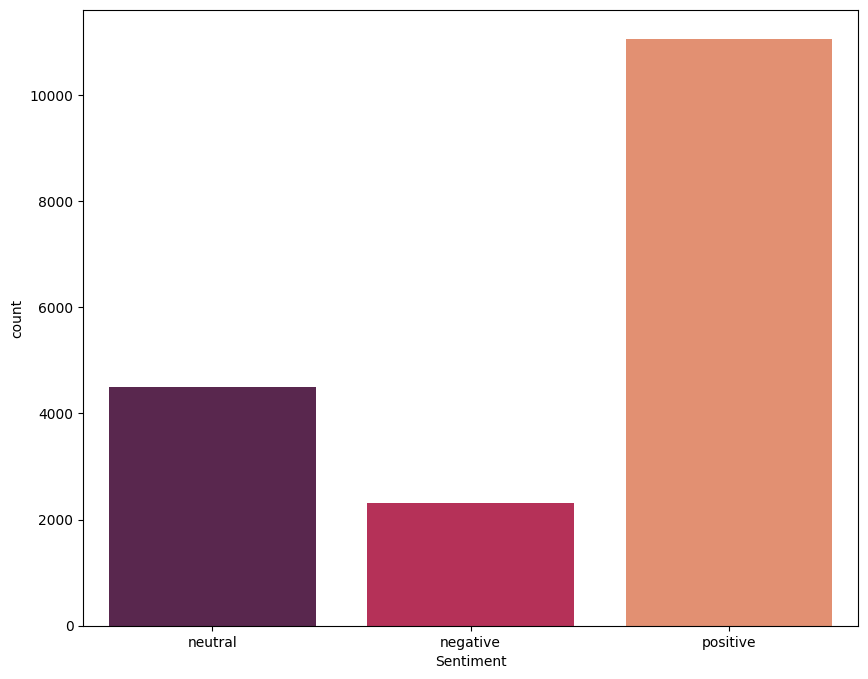

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="Sentiment", palette='rocket')
plt.show()

In [6]:
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred)
    model_precision, model_recall, model_f1,_ = precision_recall_fscore_support(y_true, y_pred,average="weighted")
    model_results = {"accuracy":model_accuracy,
                     "precision":model_precision,
                     "recall" :model_recall,
                     "f1":model_f1}
    return model_results

In [8]:
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)

def preprocess_comments(comment_series):
    return ' '.join(
        word for comment in comment_series.dropna().tolist()
        for word in comment.split() if word.lower() not in stop_words
    )

pos_text = preprocess_comments(df.loc[df["Sentiment"] == "positive", "Comment"])
neg_text = preprocess_comments(df.loc[df["Sentiment"] == "negative", "Comment"])

wordcloud_pos = WordCloud(width=400, height=200, background_color='white',
                          stopwords=stop_words, colormap='YlOrRd', max_words=200,
                          min_font_size=10).generate(pos_text)

wordcloud_neg = WordCloud(width=400, height=200, background_color='black',
                          stopwords=stop_words, colormap='BrBG', max_words=200,
                          min_font_size=10).generate(neg_text)

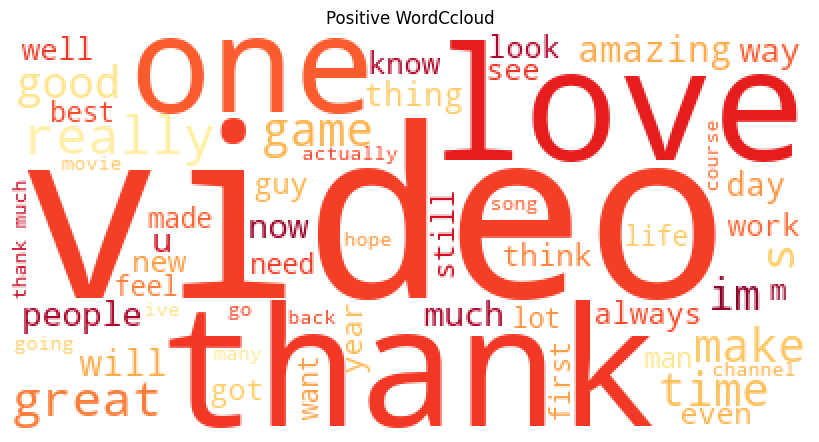

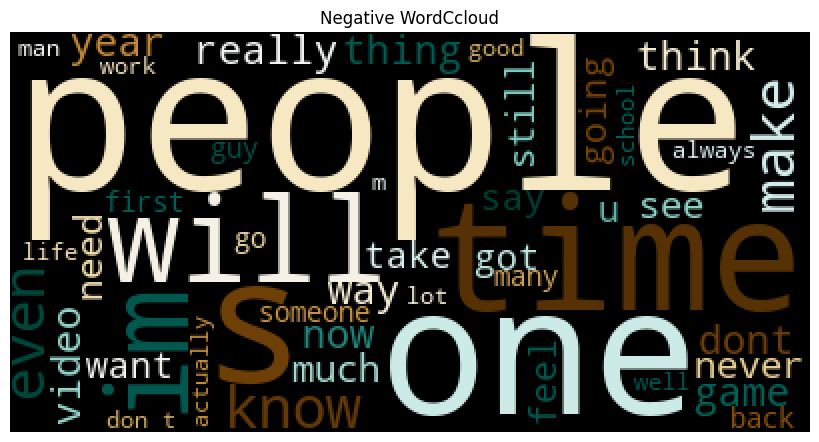

In [9]:
plt.figure(figsize=(8, 6), facecolor=None)
plt.title('Positive WordCcloud')
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.figure(figsize=(8, 6), facecolor=None)
plt.title('Negative WordCcloud')
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()